In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np

In [2]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 8000 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [5]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=2, activation="sigmoid"))
cnn.add(tf.keras.layers.Softmax())

In [6]:
cnn.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [8]:
history = cnn.fit(x=training_set, validation_data=test_set, epochs=20, callbacks=[early_stopping])

Epoch 1/20
250/250 [==============================] - 45s 178ms/step - loss: 0.6715 - accuracy: 0.5816 - val_loss: 0.6308 - val_accuracy: 0.6460
Epoch 2/20
250/250 [==============================] - 38s 153ms/step - loss: 0.6419 - accuracy: 0.6350 - val_loss: 0.6261 - val_accuracy: 0.6555
Epoch 3/20
250/250 [==============================] - 42s 170ms/step - loss: 0.6268 - accuracy: 0.6543 - val_loss: 0.6093 - val_accuracy: 0.6845
Epoch 4/20
250/250 [==============================] - 46s 182ms/step - loss: 0.6140 - accuracy: 0.6758 - val_loss: 0.5849 - val_accuracy: 0.7090
Epoch 5/20
250/250 [==============================] - 39s 155ms/step - loss: 0.6069 - accuracy: 0.6775 - val_loss: 0.5997 - val_accuracy: 0.6880
Epoch 6/20
250/250 [==============================] - 42s 169ms/step - loss: 0.6040 - accuracy: 0.6848 - val_loss: 0.5882 - val_accuracy: 0.6975
Epoch 7/20
250/250 [==============================] - 43s 171ms/step - loss: 0.5956 - accuracy: 0.6930 - val_loss: 0.5724 - val_ac

In [9]:
cnn.evaluate(test_set, verbose=2)

63/63 - 6s - loss: 0.5290 - accuracy: 0.7745 - 6s/epoch - 95ms/step


[0.5290075540542603, 0.7745000123977661]

In [10]:
test_image = image.load_img('dataset/test_set/dogs/dog.4115.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
print(result)

[[0.26894143 0.7310586 ]]


Text(0.5, 1.0, 'Training and validation loss')

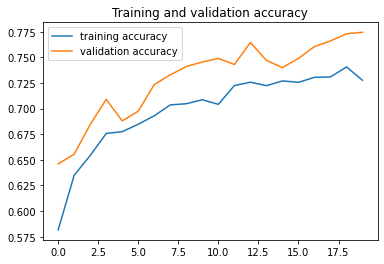

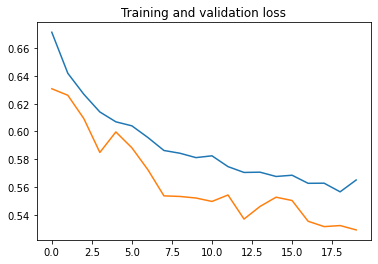

In [14]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label = 'training accuracy' )
plt.plot  ( epochs, val_acc, label = 'validation accuracy')
plt.legend(loc="upper left")
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss')